# EA1. Regresión lineal en Sklearn
Ossman Mejia Guzmán, Machine Learning - PREICA2501B010106

# Análisis exploratorio y regresión lineal en datos de E-commerce

## Descripción general
Este notebook tiene como objetivo analizar un conjunto de datos de clientes de e-commerce y construir un modelo de regresión lineal para predecir el gasto anual de los clientes en la plataforma. Se realizará un análisis exploratorio de los datos, incluyendo visualización de correlaciones, división en conjuntos de entrenamiento y prueba, ajuste del modelo y evaluación del rendimiento mediante múltiples métricas.

## Paso 1: Importar las bibliotecas necesarias
Primero, importamos las bibliotecas que utilizaremos para analizar los datos y construir el modelo de regresión lineal.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Paso 2: Carga de datos y exporación inicial de variables
Ahora, se cargan los datos desde un archivo CSV para su análisis. Este paso nos permite trabajar con la información de los clientes de e-commerce. Además, se visualizan las primeras filas para comprender mejor la estructura del dataset y se obtiene información general sobre las columnas, tipos de datos y valores nulos. Esto es importante para verificar si existen datos faltantes o tipos de datos incorrectos


In [8]:
# Cargar los datos desde un archivo CSV
df = pd.read_csv("Ecommerce Customers-1.csv")

# Exploración inicial de los datos
# Mostrar las primeras 5 filas para entender la estructura
display(df.head())
# Se obtiene información general sobre las columnas, tipos de datos y valores nulos
display(df.info())

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


None

# Paso 3: Resumen estadístico de las variables
Con esto se genera un resumen estadístico de las variables numéricas del dataset
que permite observar tendencias generales y posibles valores atípicos

In [9]:
# Se genera un resumen estadístico de las variables numéricas del dataset
# Esto permite observar tendencias generales y posibles valores atípicos
describe_data = df.describe()
display(describe_data)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Paso 4: Análisis descriptivo de los datos

In [10]:
print("\nAnálisis Descriptivo del Dataset:\n")
print(f"El gasto anual promedio de los clientes es de {describe_data.loc['mean', 'Yearly Amount Spent']:.2f}, con un mínimo de {describe_data.loc['min', 'Yearly Amount Spent']:.2f} y un máximo de {describe_data.loc['max', 'Yearly Amount Spent']:.2f}.")
print(f"El tiempo promedio en la aplicación es de {describe_data.loc['mean', 'Time on App']:.2f} minutos, mientras que en el sitio web es de {describe_data.loc['mean', 'Time on Website']:.2f} minutos.")
print(f"Los clientes tienen en promedio {describe_data.loc['mean', 'Length of Membership']:.2f} años de membresía, con una duración máxima de {describe_data.loc['max', 'Length of Membership']:.2f} años.")


Análisis Descriptivo del Dataset:

El gasto anual promedio de los clientes es de 499.31, con un mínimo de 256.67 y un máximo de 765.52.
El tiempo promedio en la aplicación es de 12.05 minutos, mientras que en el sitio web es de 37.06 minutos.
Los clientes tienen en promedio 3.53 años de membresía, con una duración máxima de 6.92 años.


# Paso 5: Correlaciones entre las variables númericas

Se crea un mapa de calor para visualizar las correlaciones entre las variables numéricas. Esto ayuda a identificar relaciones entre variables que pueden ser útiles para el modelo

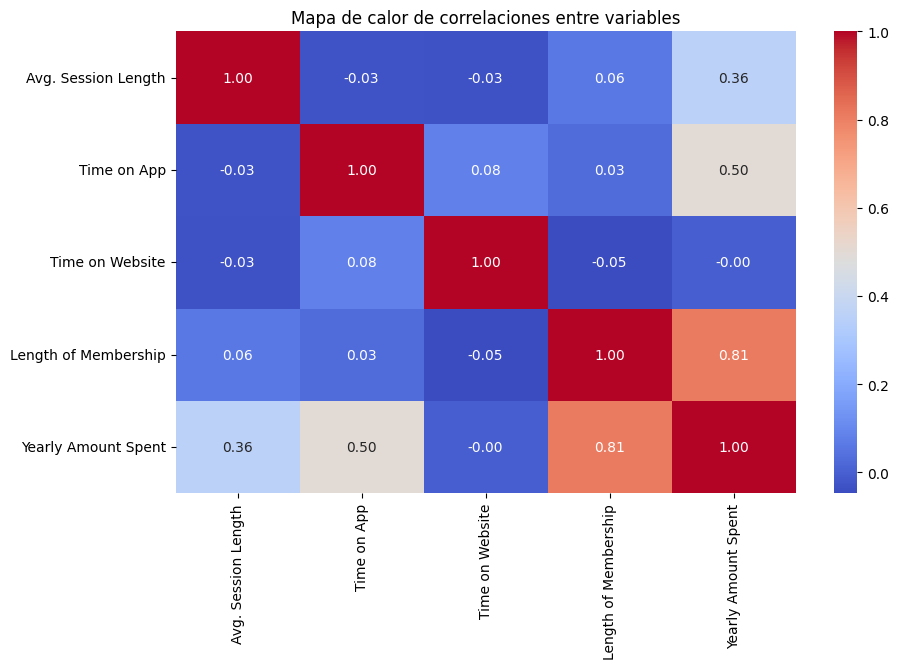

In [11]:
# Visualización de correlaciones entre variables
plt.figure(figsize=(10, 6))  # Definir el tamaño de la figura
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Crear un mapa de calor con solo columnas numéricas
plt.title("Mapa de calor de correlaciones entre variables")  # Agregar título al gráfico
plt.show()

# Paso 6: Se seleccionan las variables predictoras (X) y la variable objetivo (y)

Se eligen variables que podrían influir en el gasto anual de los clientes
X = Time on Website, Time on App, Length of Membership
y = Yearly Amount Spent

In [12]:
# Selección de variables para la regresión lineal
# Se eligen las variables predictoras (X) y la variable objetivo (y)
X = df[['Time on Website', 'Time on App', 'Length of Membership']]
y = df['Yearly Amount Spent']

# Paso 7: Defición de conjuntos de entrenamiento y prueba

In [13]:
# Se dividen los datos en conjuntos de entrenamiento y prueba
# Se usa un 70% de los datos para entrenar el modelo y un 30% para evaluarlo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 7: Creación del modelo de regresión lineal

In [14]:
# Se crea un modelo de regresión lineal para analizar la relación entre las variables
modelo = LinearRegression()

# Se entrena el modelo utilizando los datos de entrenamiento
modelo.fit(X_train, y_train)

# Se generan predicciones utilizando los datos de prueba
# Esto permite evaluar qué tan bien funciona el modelo
y_pred = modelo.predict(X_test)

# Paso 8: Evaluación del modelo

In [15]:
# Se calculan métricas de evaluación para analizar el rendimiento del modelo
# Se incluyen MAE, MSE, RMSE y R^2 Score para medir el error de las predicciones
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación (R^2)

Se imprimen los resultados de las métricas

In [16]:
# Imprimir los resultados de las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

MAE: 22.57620980116826
MSE: 758.6208936474467
RMSE: 27.543073424137813
R^2 Score: 0.8603861873916312


# Paso 9: Análisis de los resultados de las métricas

MAE (Error Absoluto Medio) = 22.58
Sugiere o indica que, en promedio, el modelo se equivoca en aproximadamente 22.58 unidades al predecir el gasto anual de los clientes.

MSE (Error Cuadrático Medio) = 758.62
El MSE penaliza más los errores grandes al elevarlos al cuadrado, por lo que su valor es más alto. Esto indica que hay algunas predicciones con errores significativos.

RMSE (Raíz del Error Cuadrático Medio) = 27.54
El RMSE es similar al MAE, pero al estar en la misma escala que la variable objetivo, da una idea más clara del error promedio. Sugiere o implica que el modelo tiene errores significativos en algunas predicciones.

R² Score = 0.86
El coeficiente de determinación indica que el modelo explica el 86% de la variabilidad en los datos. Sin embargo, aún hay un 14% de variabilidad no explicada, lo que sugiere que otras variables podrían mejorar el modelo.

Así entonces, el modelo de regresión tiene un buen desempeño con un R² de 0.86, pero el error promedio aún es relativamente alto (MAE de 22.58 y RMSE de 27.54).

# Paso 10: Visualización de relación entre los valores reales y los predichos

Aquí es importante mencionar que un buen modelo debe mostrar una tendencia alineada a la diagonal

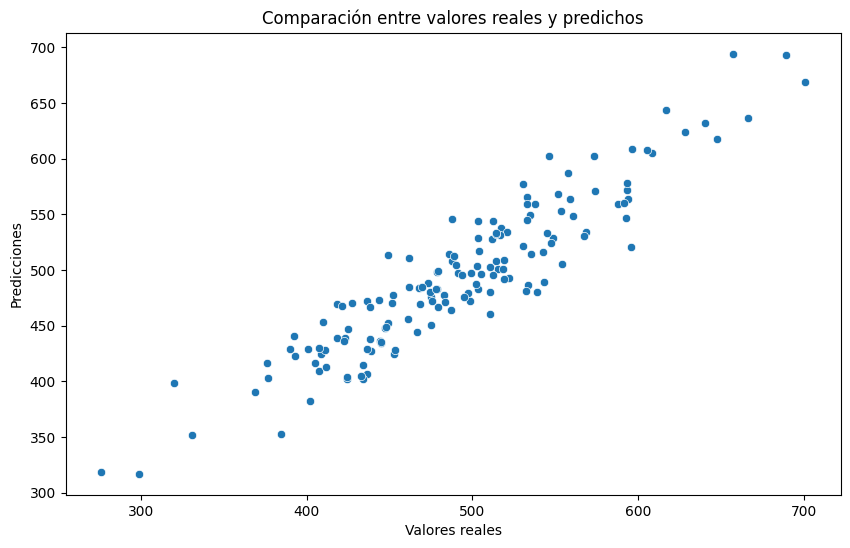

In [17]:
# Visualización de la relación entre los valores reales y los predichos
plt.figure(figsize=(10, 6))  # Definir tamaño de la figura
sns.scatterplot(x=y_test, y=y_pred)  # Gráfico de dispersión entre valores reales y predichos
plt.xlabel("Valores reales")  # Etiqueta del eje X
plt.ylabel("Predicciones")  # Etiqueta del eje Y
plt.title("Comparación entre valores reales y predichos")  # Título del gráfico
plt.show()

# Paso 11: Análisis de los residuos

Aquí es importante mencionar que un buen modelo debe mostrar residuos distribuidos normalmente alrededor de cero

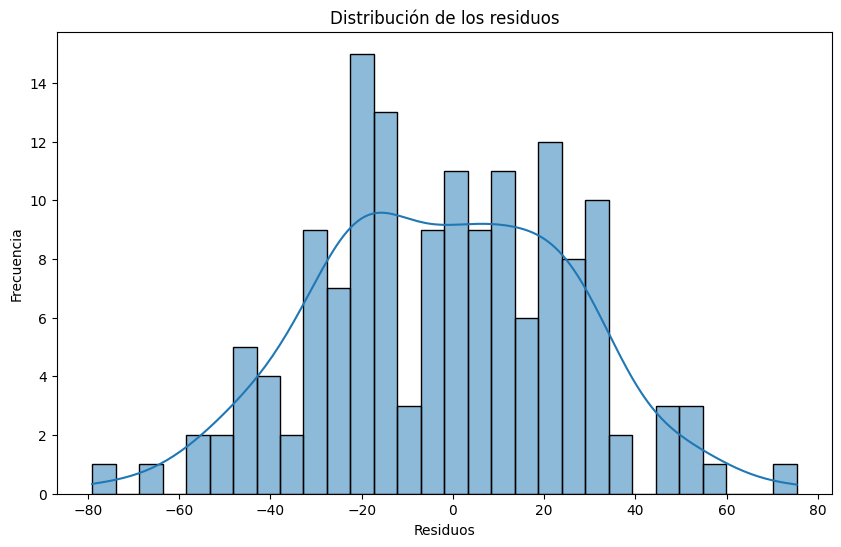

In [18]:
# Análisis de residuos
residuos = y_test - y_pred  # Calcular los residuos (diferencia entre valores reales y predichos)
plt.figure(figsize=(10, 6))  # Definir tamaño de la figura
sns.histplot(residuos, bins=30, kde=True)  # Histograma de residuos con curva de densidad
plt.xlabel("Residuos")  # Etiqueta del eje X
plt.ylabel("Frecuencia")  # Etiqueta del eje Y
plt.title("Distribución de los residuos")  # Título del gráfico
plt.show()


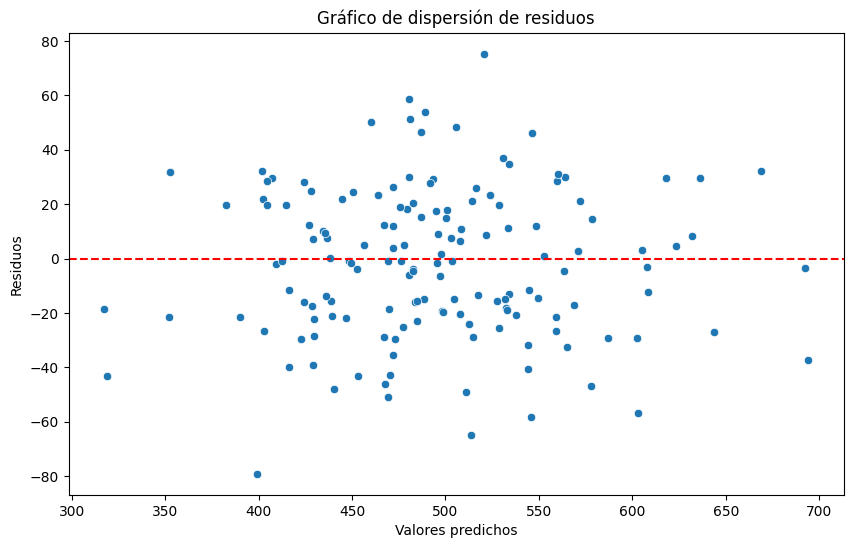

In [19]:
# Gráfico de dispersión de residuos
plt.figure(figsize=(10, 6))  # Definir tamaño de la figura
sns.scatterplot(x=y_pred, y=residuos)  # Gráfico de dispersión de predicciones vs residuos
plt.axhline(y=0, color='r', linestyle='--')  # Línea en y=0 para referencia
plt.xlabel("Valores predichos")  # Etiqueta del eje X
plt.ylabel("Residuos")  # Etiqueta del eje Y
plt.title("Gráfico de dispersión de residuos")  # Título del gráfico
plt.show()


# Paso 12: Conclusiones

A continuación se describen las conclusiones de la evidencia de aprendizaje con base en los resultados

Por un lado, el modelo de regresión lineal obtuvo un coeficiente de determinación R² = 0.86, lo que indica que aproximadamente el 86% de la variabilidad en el gasto anual de los clientes puede explicarse mediante las variables seleccionadas (Tiempo en la App, Tiempo en el sitio Web y Antigüedad de membresía).

Por otro lado, el MAE (22.58) y el RMSE (27.54) indican que, en promedio, el modelo comete un error de aproximadamente 22 a 27 unidades monetarias en sus predicciones.
El MSE (758.62) puede estar confirmando la presencia de ciertos errores elevados, lo que podría deberse a valores atípicos o relaciones no capturadas.

Tambien, se observó una fuerte correlación entre la antigüedad de la membresía (Length of Membership) y el gasto anual, lo que sugiere que los clientes más antiguos tienden a gastar más.
El tiempo en la aplicación (Time on App) mostró una mayor relación con el gasto anual en comparación con el tiempo en el sitio web (Time on Website). Esto podría indicar que los clientes que usan más la aplicación generan más compras.

El histograma de los residuos sugiere una distribución aproximadamente normal, lo que indica que el modelo no tiene sesgos evidentes. De igual forma, el gráfico de dispersión de residuos no muestra patrones claros, lo que refuerza que el modelo no presenta heterocedasticidad significativa.